In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout
from keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_crossentropy, binary_crossentropy
import matplotlib.pyplot as plt
from keras.regularizers import l1, l2
from keras.callbacks import LearningRateScheduler

In [ ]:
tf.__version__

'2.3.0'

In [ ]:

# specifying path for the dataset
train_path = 'drive/My Drive/training'
valid_path = 'drive/My Drive/validate'
test_path = 'drive/My Drive/test'

In [ ]:
# performing image augmentation
train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=40, horizontal_flip=True)
valid_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen  = ImageDataGenerator(rescale=1./255)

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)

In [ ]:
# loading the dataset
train_data = train_data_gen.flow_from_directory(train_path, target_size=(250,250), classes=['cat', 'dog'], class_mode='binary', batch_size=20, shuffle=True)
valid_data = data_gen.flow_from_directory(valid_path, target_size=(250,250), classes=['cat', 'dog'], class_mode='binary', batch_size=20)
test_data = data_gen.flow_from_directory(test_path, target_size=(250,250), classes=['cat', 'dog'], class_mode='binary', batch_size=10)

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model_d = Sequential([
                    Conv2D(filters=16, kernel_size=(3,3), input_shape=(250,250,3), padding='same', activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(filters=32, kernel_size=(3,3),   activation='relu', padding='same', kernel_regularizer=l2(0.01)),
                    MaxPool2D((2,2)),
                    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=l2(0.01)),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(1, activation='sigmoid')           
])

In [ ]:
model_d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 250, 250, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)            

In [ ]:
model_d.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_d.fit(train_data, epochs=20, validation_data=valid_data, verbose=2)

Epoch 1/20
20/20 - 7s - loss: 0.5581 - accuracy: 0.8550 - val_loss: 0.9153 - val_accuracy: 0.6800
Epoch 2/20
20/20 - 7s - loss: 0.5561 - accuracy: 0.8625 - val_loss: 0.9719 - val_accuracy: 0.6800
Epoch 3/20
20/20 - 7s - loss: 0.5513 - accuracy: 0.8575 - val_loss: 0.9154 - val_accuracy: 0.7000
Epoch 4/20
20/20 - 7s - loss: 0.5806 - accuracy: 0.8525 - val_loss: 0.9286 - val_accuracy: 0.6800
Epoch 5/20
20/20 - 7s - loss: 0.5530 - accuracy: 0.8575 - val_loss: 0.9803 - val_accuracy: 0.6800
Epoch 6/20
20/20 - 7s - loss: 0.5420 - accuracy: 0.8725 - val_loss: 0.8943 - val_accuracy: 0.7100
Epoch 7/20
20/20 - 7s - loss: 0.5350 - accuracy: 0.8800 - val_loss: 0.9074 - val_accuracy: 0.7300
Epoch 8/20
20/20 - 7s - loss: 0.5371 - accuracy: 0.8675 - val_loss: 0.9049 - val_accuracy: 0.7200
Epoch 9/20
20/20 - 7s - loss: 0.5297 - accuracy: 0.8650 - val_loss: 0.9365 - val_accuracy: 0.7000
Epoch 10/20
20/20 - 7s - loss: 0.5214 - accuracy: 0.8725 - val_loss: 0.9305 - val_accuracy: 0.7000
Epoch 11/20
20/20 -

In [ ]:
model_d.save('e70lr-4binary.h5')

In [ ]:
print(history.history.keys())

In [ ]:
history.history['loss']

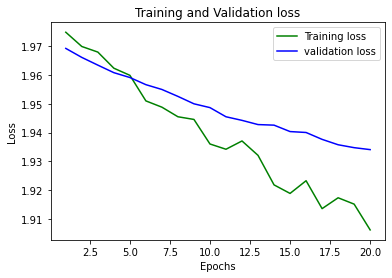

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model_d.predict(test_data)

In [ ]:
test_data.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
predictions

array([[0.6433263 ],
       [0.9938309 ],
       [0.9524999 ],
       [0.27321607],
       [0.7491213 ],
       [0.6616351 ],
       [0.3746942 ],
       [0.517316  ],
       [0.9580087 ],
       [0.9251244 ],
       [0.1033592 ],
       [0.9974782 ],
       [0.79055464],
       [0.36935478],
       [0.9821192 ],
       [0.9595631 ],
       [0.00943332],
       [0.999933  ],
       [0.7558079 ],
       [0.12778375]], dtype=float32)

In [ ]:
predictions[15]

array([0.9595631], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
        normalize=False,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
test_labels = test_data.classes
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

Confusion matrix, without normalization
[[10  0]
 [10  0]]


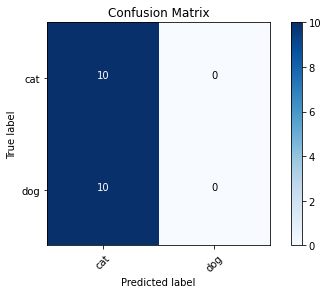

In [ ]:
cm_plot_labels = ['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [ ]:
callback = LearningRateScheduler(scheduler)

In [ ]:
tf.keras.backend.clear_session()